<h1 style="font-size: 40px; margin-bottom: 0px;">13.1 Exploring DESeq2 results</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 950px;"></hr>

Last week, we ran DESeq2 on our class dataset and got the results of our differential expression analysis. Today, we'll be playing around with our data, looking at our results in aggregate and pulling out data that we might think is interesting to look at in more detail. We'll make some plots that we've generated in R, but breaking it down into smaller steps to better understand what is going on under the hood and exactly what we're looking at in each of these plots. We'll work together to walk through the logic behind step as we build up each plot increasing in complexity.

For those of you who are comfortable, you can feel free to go on ahead at your own pace. And for those of you who are more comfortable using R, you can also feel free to change this notebook's kernel to R, and do this lesson in R. I'll switch between R and Python if people want to work in R as well.

<strong>Learning objectives:</strong>

<ul>
    <li>Navigate differential expression results</li>
    <li>Practice working with data in Python</li>
    <li>Practice data visualization</li>
    <ul>
        <li>MA plot</li>
        <li>Volcano plot</li>
        <li>Violin plot</li>
        <li>Box-and-whisker plot</li>
    </ul>
</ul>

<h2>Packages for those of you who want to work in Python</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Packages for those of you who want to work in R</h2>

In [2]:
# library(ggplot2)
# library(dplyr)
# library(ggrepel)
# library(reshape2)

<h1>Import data for today's exercises</h1>

To start, we'll first import the data that we'll need for today's exercises. We'll be working with:

<ul>
    <li>Normalized counts matrix extracted from DESeq2</li>
    <li>DESeq2 results matrix</li>
    <li>DESeq2 shrunken log fold change results matrix</li>
    <li>Conditions matrix</li>
</ul>

In [3]:
norm_counts = pd.read_csv('/home/jovyan/MCB201B_F2024/Week_13/data/1M_norm_counts.csv', 
                          delimiter=',')

res = pd.read_csv('/home/jovyan/MCB201B_F2024/Week_13/data/1M_results.csv',
                  delimiter=',')

shrinklfc = pd.read_csv('/home/jovyan/MCB201B_F2024/Week_13/data/1M_results_lfcShrink.csv',
                        delimiter=',')

conditions = pd.read_csv('/home/jovyan/MCB201B_F2024/Week_13/data/1M_conditions_matrix.csv',
                         delimiter=',')

To make things easier later on, let's update the <code>Unnamed: 0</code> column name for our DataFrames.

In [4]:
norm_counts.rename(columns={'Unnamed: 0' : 'gene'}, inplace=True)
res.rename(columns={'Unnamed: 0' : 'gene'}, inplace=True)
shrinklfc.rename(columns={'Unnamed: 0' : 'gene'}, inplace=True)

In [5]:
shrinklfc.head()

,gene,baseMean,log2FoldChange,lfcSE,pvalue,padj
0,A1BG,1.085171,0.211319,0.392672,0.071757,0.199049
1,A1BG-AS1,1.780883,-0.142668,0.317841,0.273008,0.489257
2,A2M,0.066334,-0.017169,0.310137,0.901389,NaN
3,A2M-AS1,0.304144,-0.069617,0.319293,0.332131,NaN
4,A4GALT,9.990338,0.269608,0.258235,0.130600,0.303393


Now let's double check to see how these DataFrames look:

<h1>(Re)generate an MA plot</h1>

To refamiliarize ourselves with Python, we'll regenerate an MA plot using our results from the DESeq2 dataset to help us better understand what we're looking at in the plot and where the values are coming from.

For this, we'll once again make use of <code>sns.scatterplot()</code>. <a href="https://seaborn.pydata.org/generated/seaborn.scatterplot.html" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</u></a>

In [6]:
res.head()

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,A1BG,1.085171,1.773600,0.984973,1.800658,0.071757,0.199049
1,A1BG-AS1,1.780883,-0.735528,0.671003,-1.096162,0.273008,0.489257
2,A2M,0.066334,-0.379204,3.060383,-0.123907,0.901389,NaN
3,A2M-AS1,0.304144,-1.761840,1.816649,-0.969830,0.332131,NaN
4,A4GALT,9.990338,0.445315,0.294571,1.511738,0.130600,0.303393


In [7]:
res_alpha = res[res['padj'] <= 0.05]

In [8]:
res_alpha.head()

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
6,AACS,23.083715,0.682880,0.195596,3.491272,4.807258e-04,3.683598e-03
8,AADACP1,0.864535,-3.263385,1.104477,-2.954688,3.129855e-03,1.736056e-02
11,AAK1,74.946544,0.522796,0.147624,3.541411,3.979925e-04,3.141832e-03
16,AARS1,116.680203,-1.357753,0.170880,-7.945677,1.931335e-15,1.675192e-13
20,AASDHPPT,99.886525,-0.344633,0.133502,-2.581481,9.837744e-03,4.377307e-02


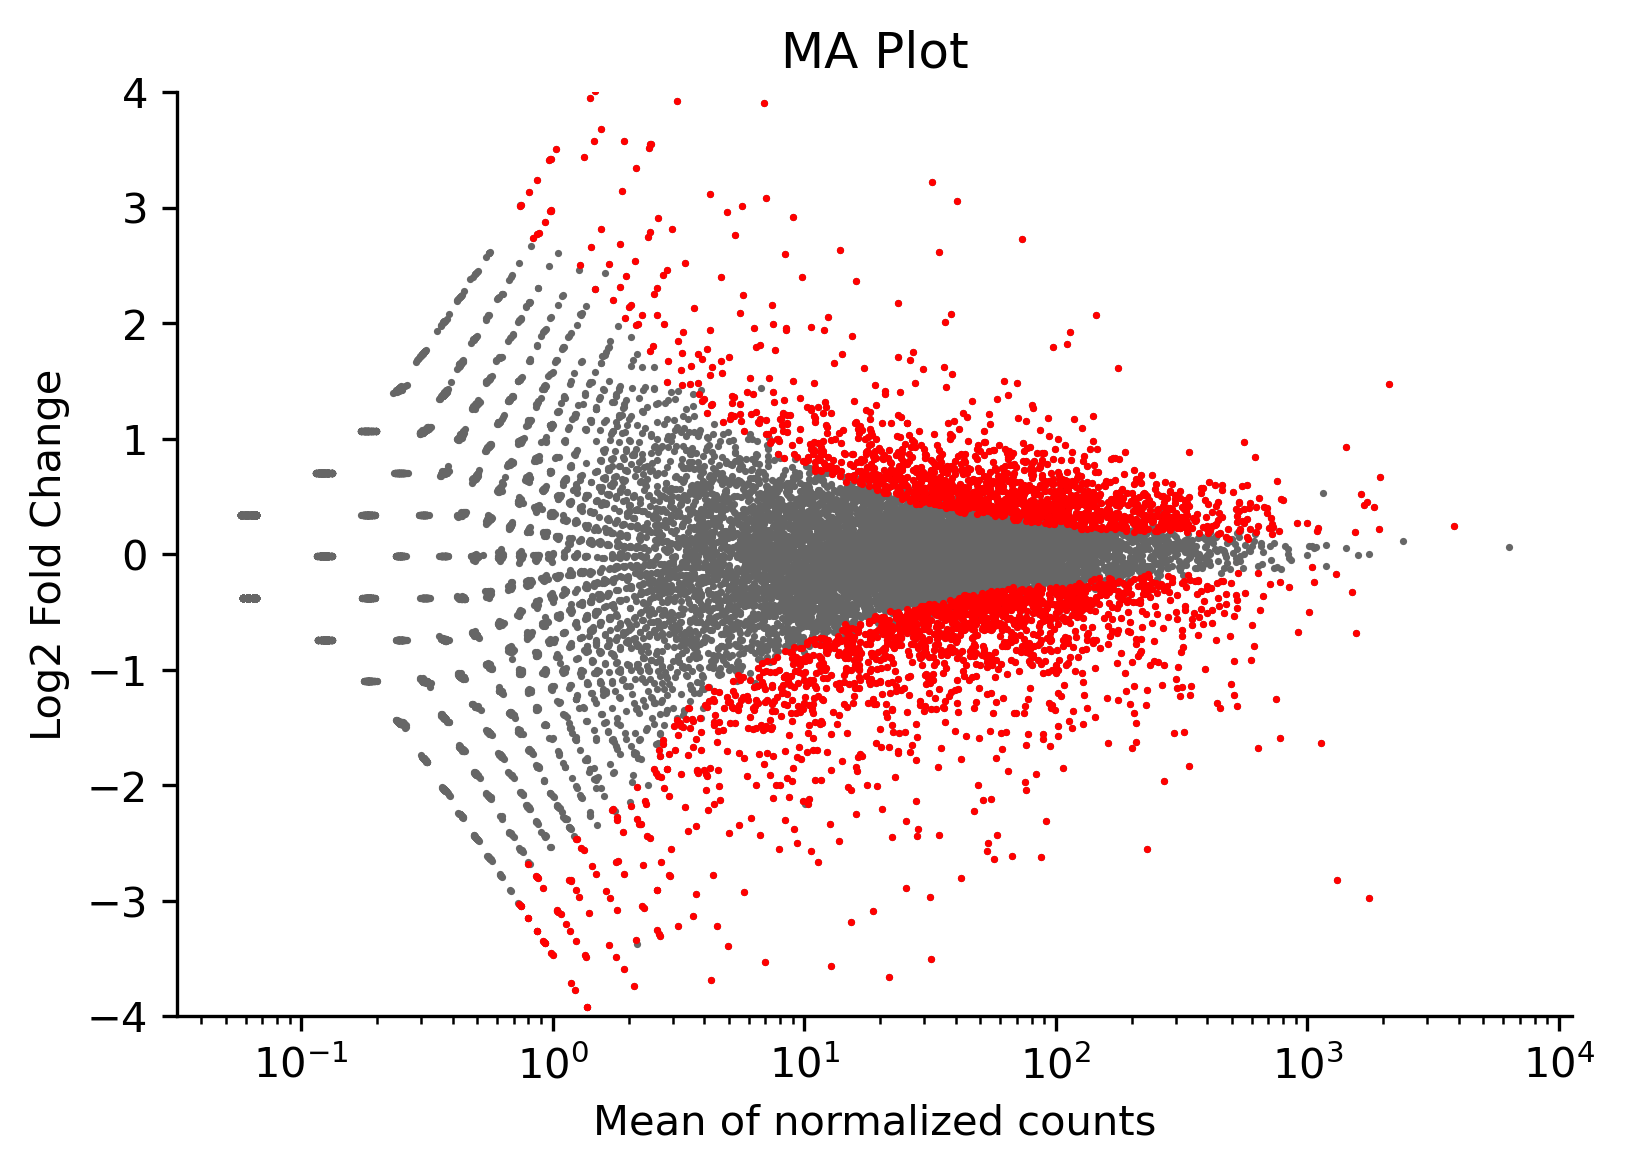

In [9]:
fig, ax = plt.subplots()

sns.scatterplot(x=res['baseMean'],
                y=res['log2FoldChange'],
                c='#666666',
                linewidth=0,
                s=3
               )

sns.scatterplot(x=res_alpha['baseMean'],
                y=res_alpha['log2FoldChange'],
                c='#FF0000',
                linewidth=0,
                s=3
               )

ax.set_ylim(-4,4)
ax.set_xscale('log')
ax.set_title('MA Plot')
ax.set_xlabel('Mean of normalized counts')
ax.set_ylabel('Log2 Fold Change')

fig.set_dpi(300)
fig.set_size_inches(6,4)
sns.despine()

<h2>Plot MA plot of shrunken log fold change</h2>

For this one, we'll regenerate an MA plot of the shrunken log fold change and add a little bit more complexity by visually differentiating between significantly upregulated and significantly downregulated genes.

In [10]:
shrinklfc.head()

,gene,baseMean,log2FoldChange,lfcSE,pvalue,padj
0,A1BG,1.085171,0.211319,0.392672,0.071757,0.199049
1,A1BG-AS1,1.780883,-0.142668,0.317841,0.273008,0.489257
2,A2M,0.066334,-0.017169,0.310137,0.901389,NaN
3,A2M-AS1,0.304144,-0.069617,0.319293,0.332131,NaN
4,A4GALT,9.990338,0.269608,0.258235,0.130600,0.303393


In [11]:
shrinklfc_alpha = shrinklfc[shrinklfc['padj'] <= 0.05]

In [12]:
shrinklfc_UP = shrinklfc_alpha[shrinklfc_alpha['log2FoldChange'] > 0]
shrinklfc_DOWN = shrinklfc_alpha[shrinklfc_alpha['log2FoldChange'] < 0]

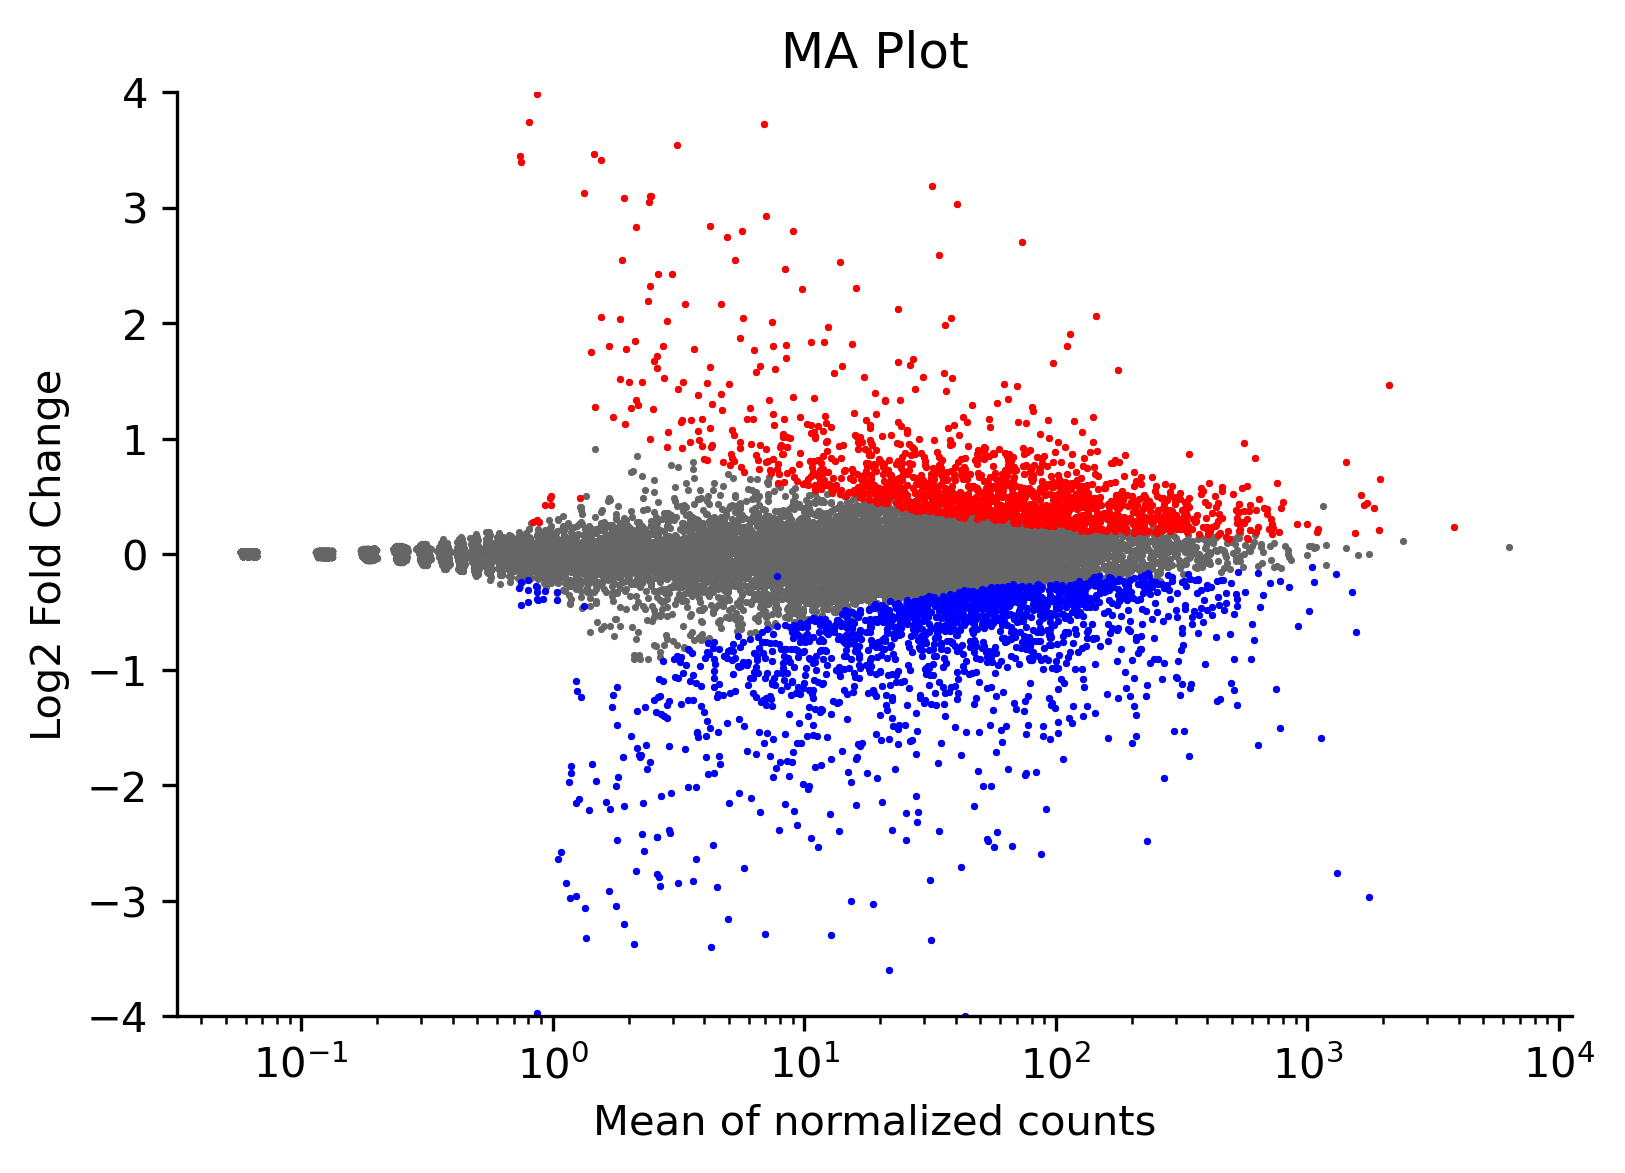

In [13]:
fig, ax = plt.subplots()

sns.scatterplot(x=shrinklfc.baseMean,
                y=shrinklfc.log2FoldChange,
                c='#666666',
                linewidth=0,
                s=3
               )

sns.scatterplot(x=shrinklfc_UP.baseMean,
                y=shrinklfc_UP.log2FoldChange,
                c='#FF0000',
                linewidth=0,
                s=3
               )

sns.scatterplot(x=shrinklfc_DOWN.baseMean,
                y=shrinklfc_DOWN.log2FoldChange,
                c='#0000FF',
                linewidth=0,
                s=3
               )


ax.set_ylim(-4,4)
ax.set_xscale('log')
ax.set_title('MA Plot')
ax.set_xlabel('Mean of normalized counts')
ax.set_ylabel('Log2 Fold Change')

fig.set_dpi(300)
fig.set_size_inches(6,4)
sns.despine()

<h1>Generate a volcano plot from your DESeq2 results</h1>

Another plot that you'll commonly see with accompanying differential expression analyses is the volcano plot. In volcano plots, each gene's log2 fold change is plotted along the X-axis, and its -log10(FDR) is plotted along the Y-axis. The resulting scatter plot sort of resembles an erupting volcano with the most significant genes higher up along the Y-axis, while genes that exhibit a greater log fold change are found further towards the negative and positive extremes of the X-axis.

For this plot, we'll continue to visually differentiate between upregulated and downregulated genes, and then add another layer of complexity by labeling the top 10 most significantly upregulated and top 10 most significantly downregulated genes.

In [14]:
res_UP = res_alpha[res_alpha['log2FoldChange'] >= 1]
res_DOWN = res_alpha[res_alpha['log2FoldChange'] <= -1]

In [15]:
top10_UP = res_UP.sort_values(by='padj', ascending=True).head(10)

In [16]:
top10_DOWN = res_DOWN.sort_values(by='padj', ascending=True).head(10)

In [17]:
top10_UP

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
13461,SAA1,144.550297,2.068469,0.110698,18.685739,6.467724e-78,4.487953e-74
1412,BMP4,73.178052,2.724591,0.165160,16.496640,3.878864e-61,1.794362e-57
11610,PPME1,110.946754,1.817422,0.110757,16.409022,1.648382e-60,3.812709e-57
15652,THBS1,2113.280246,1.472143,0.089602,16.429785,1.170725e-60,3.812709e-57
2390,CEMIP,113.389105,1.918980,0.123915,15.486309,4.292345e-54,5.956916e-51
16724,UCA1,40.543906,3.056938,0.207472,14.734219,3.886628e-49,4.149125e-46
2850,COL5A1,176.364540,1.612283,0.121993,13.216165,7.078178e-40,5.170050e-37
10444,NUP210,32.055308,3.219876,0.247513,13.008897,1.089026e-38,7.196904e-36
10003,NEDD9,34.338074,2.615496,0.213634,12.242904,1.833524e-34,9.786787e-32
440,AKR1B1,140.321990,1.197689,0.099352,12.055033,1.824602e-33,9.043508e-31


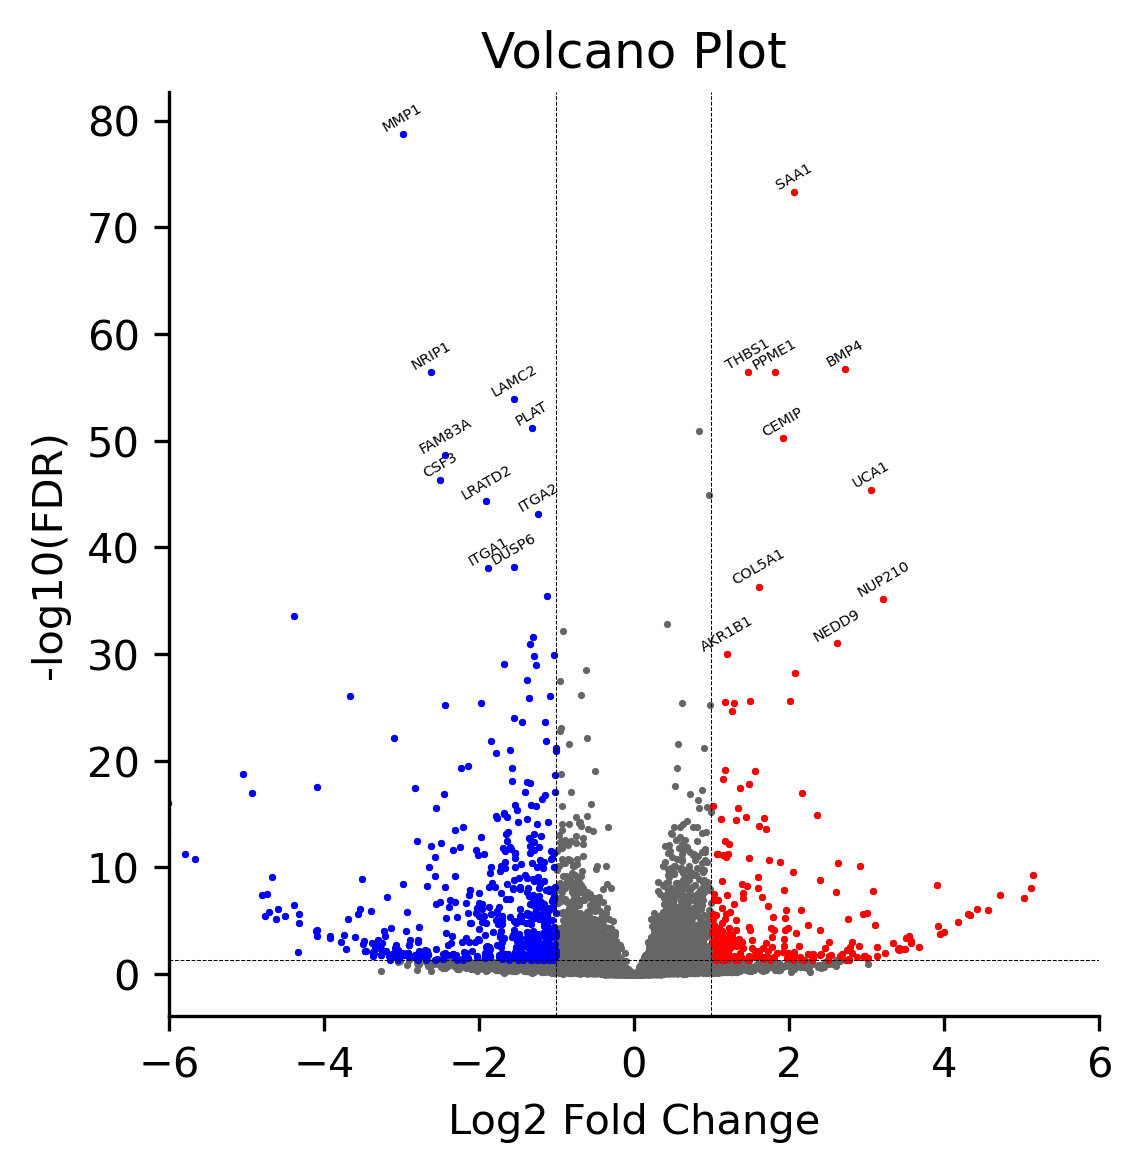

In [18]:
fig, ax = plt.subplots()

sns.scatterplot(x=res.log2FoldChange,
                y=np.log10(res.padj**-1),
                s=3,
                linewidth=0,
                c='#666666'
               )

sns.scatterplot(x=res_UP.log2FoldChange,
                y=np.log10(res_UP.padj**-1),
                s=3,
                linewidth=0,
                c='#FF0000'                
               )

sns.scatterplot(x=res_DOWN.log2FoldChange,
                y=np.log10(res_DOWN.padj**-1),
                s=3,
                linewidth=0,
                c='#0000FF'  
               )

for i, j in zip(top10_UP.gene, top10_DOWN.gene):
    plt.text(x=top10_UP.loc[top10_UP['gene'] == i, 'log2FoldChange'],
             y=np.log10(top10_UP.loc[top10_UP['gene'] == i, 'padj']**-1),
             s=i,
             ha='center',
             va='bottom',
             rotation=30,
             fontsize=3.5
            )
    plt.text(x=top10_DOWN.loc[top10_DOWN['gene'] == j, 'log2FoldChange'],
             y=np.log10(top10_DOWN.loc[top10_DOWN['gene'] == j, 'padj']**-1),
             s=j,
             ha='center',
             va='bottom',
             rotation=30,
             fontsize=3.5
            )

plt.axvline(x=-1,
            c='k',
            ls='--',
            lw='0.25'
           )

plt.axvline(x=1,
            c='k',
            ls='--',
            lw='0.25'
           )

plt.axhline(y=np.log10(0.05**-1),
            c='k',
            ls='--',
            lw='0.25'
           )

ax.set_xlim(-6, 6)
ax.set_title('Volcano Plot')
ax.set_xlabel('Log2 Fold Change')
ax.set_ylabel('-log10(FDR)')

fig.set_dpi(300)
fig.set_size_inches(4,4)
sns.despine()

<h1>Guided Exercise: Violin plots and box-and-whisker plots</h1>

Another way that you can visualize your RNA-seq data is to generate violin plots or box-and-whisker plots for individual genes (or sets of genes) using the normalized count matrix. The set up for either one is the same since they are essentially different ways of visualizing the distribution of your samples.

For plotting violin plots, we'll make use of <code>sns.violinplot()</code>. <a href="https://seaborn.pydata.org/generated/seaborn.violinplot.html" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</u></a>

And to plot a box-and-whisker plot, we'll make use of <code>sns.boxplot()</code>. <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</u></a>

For this guided exercise, we can continue to make use of the genes that were identified to be differentially expressed that we labeled in our volcano plot and use them to pull out the associated normalized counts. First we can do this for our top ten significantly upregulated genes (based on their padj).

In [19]:
norm_counts.head()

,gene,ctrl_g1,taz_g1,ctrl_g2,taz_g2,ctrl_g3,taz_g3,ctrl_g4,taz_g4,ctrl_g5,taz_g5,ctrl_g6,taz_g6,ctrl_g7,taz_g7,ctrl_g8,taz_g8
0,A1BG,0.000000,1.909227,0.984459,5.567589,0.000000,0.984725,0.978265,1.932920,0.935575,0.917749,0.000000,0.000000,1.061338,1.060735,0.000000,1.030151
1,A1BG-AS1,2.964164,1.909227,1.968918,1.855863,3.909410,2.954176,1.956530,0.966460,0.935575,0.917749,1.984798,2.016977,1.061338,0.000000,3.092942,0.000000
2,A2M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.061338,0.000000,0.000000,0.000000
3,A2M-AS1,0.000000,0.000000,2.953377,0.000000,0.977352,0.000000,0.000000,0.000000,0.935575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,A4GALT,11.856654,8.591522,6.891213,18.558630,6.841467,11.816703,7.826119,7.731681,3.742300,9.177489,12.901190,13.110351,7.429369,13.789553,10.309807,9.271357


In [45]:
norm_counts_UP = norm_counts.reindex(top10_UP.index)

Let's take a look at the new filtered DataFrame.

In [46]:
norm_counts_UP

,gene,ctrl_g1,taz_g1,ctrl_g2,taz_g2,ctrl_g3,taz_g3,ctrl_g4,taz_g4,ctrl_g5,taz_g5,ctrl_g6,taz_g6,ctrl_g7,taz_g7,ctrl_g8,taz_g8
13461,SAA1,45.450508,185.195032,65.958756,266.316339,43.980860,249.135494,46.956714,247.413801,60.812378,208.329011,50.612361,254.139119,76.416363,216.389912,55.672957,240.025142
1412,BMP4,10.868600,127.918218,9.844590,137.333861,16.614991,133.922637,19.565297,148.834865,20.582651,150.510827,23.817582,104.882811,20.165429,98.648342,32.991382,114.346741
11610,PPME1,42.486344,177.558123,44.300657,185.586299,34.207335,162.479670,47.934979,206.822474,47.714327,175.290049,57.559156,149.256308,56.250934,153.806555,62.889822,171.005037
15652,THBS1,1204.438463,3572.163959,1280.781223,3067.741516,1236.350828,3303.753296,1283.483512,3370.046577,1130.174647,3404.848597,1085.684765,2879.234858,886.217548,2791.854157,850.559071,2465.150920
2390,CEMIP,54.342999,156.556625,49.222952,207.856654,35.184688,178.235275,45.978449,165.264687,60.812378,144.086585,54.581958,210.774110,37.146843,215.329177,41.239228,157.613076
16724,UCA1,4.940273,73.505244,9.844590,61.243479,12.705582,62.037692,5.869589,79.249733,11.226900,65.160175,3.969597,71.602688,12.736061,89.101728,8.247846,77.261312
2850,COL5A1,74.104089,224.334188,52.176330,275.595653,78.188195,273.753626,97.826487,258.044863,74.846003,227.601739,95.270327,323.724830,110.379192,310.795315,113.407876,231.783935
10444,NUP210,1.976109,70.641404,4.922295,67.738999,6.841467,65.976593,5.869589,41.557787,2.806725,55.982686,6.946795,58.492337,9.552045,44.550864,11.340788,57.688446
10003,NEDD9,8.892491,57.276814,13.782427,77.018314,6.841467,62.037692,11.739178,60.886990,15.904776,61.489180,5.954395,57.483848,8.490707,58.340417,5.154903,38.115580
440,AKR1B1,67.187708,172.785055,103.368200,199.505271,78.188195,179.220000,77.282925,184.593890,94.493079,185.385288,73.437544,230.943882,109.317853,216.389912,78.354533,194.698506


Much like how DESeq2 required a conditions matrix to understand which condition each sample belonged to, we'll swap out our column headers with the information from our conditions matrix. That way, we can specify how we want to group our data later on based on which condition each sample belongs to. 

In [22]:
norm_counts_UP.columns

Index(['gene', 'ctrl_g1', 'taz_g1', 'ctrl_g2', 'taz_g2', 'ctrl_g3', 'taz_g3',
       'ctrl_g4', 'taz_g4', 'ctrl_g5', 'taz_g5', 'ctrl_g6', 'taz_g6',
       'ctrl_g7', 'taz_g7', 'ctrl_g8', 'taz_g8'],
      dtype='object')

In [47]:
['gene'] + conditions.condition.to_list()

['gene',
 'control',
 'taz_ko',
 'control',
 'taz_ko',
 'control',
 'taz_ko',
 'control',
 'taz_ko',
 'control',
 'taz_ko',
 'control',
 'taz_ko',
 'control',
 'taz_ko',
 'control',
 'taz_ko']

In [48]:
norm_counts_UP.columns = ['gene'] + conditions.condition.to_list()

In [49]:
norm_counts_UP

,gene,control,taz_ko,control,taz_ko,control,taz_ko,control,taz_ko,control,taz_ko,control,taz_ko,control,taz_ko,control,taz_ko
13461,SAA1,45.450508,185.195032,65.958756,266.316339,43.980860,249.135494,46.956714,247.413801,60.812378,208.329011,50.612361,254.139119,76.416363,216.389912,55.672957,240.025142
1412,BMP4,10.868600,127.918218,9.844590,137.333861,16.614991,133.922637,19.565297,148.834865,20.582651,150.510827,23.817582,104.882811,20.165429,98.648342,32.991382,114.346741
11610,PPME1,42.486344,177.558123,44.300657,185.586299,34.207335,162.479670,47.934979,206.822474,47.714327,175.290049,57.559156,149.256308,56.250934,153.806555,62.889822,171.005037
15652,THBS1,1204.438463,3572.163959,1280.781223,3067.741516,1236.350828,3303.753296,1283.483512,3370.046577,1130.174647,3404.848597,1085.684765,2879.234858,886.217548,2791.854157,850.559071,2465.150920
2390,CEMIP,54.342999,156.556625,49.222952,207.856654,35.184688,178.235275,45.978449,165.264687,60.812378,144.086585,54.581958,210.774110,37.146843,215.329177,41.239228,157.613076
16724,UCA1,4.940273,73.505244,9.844590,61.243479,12.705582,62.037692,5.869589,79.249733,11.226900,65.160175,3.969597,71.602688,12.736061,89.101728,8.247846,77.261312
2850,COL5A1,74.104089,224.334188,52.176330,275.595653,78.188195,273.753626,97.826487,258.044863,74.846003,227.601739,95.270327,323.724830,110.379192,310.795315,113.407876,231.783935
10444,NUP210,1.976109,70.641404,4.922295,67.738999,6.841467,65.976593,5.869589,41.557787,2.806725,55.982686,6.946795,58.492337,9.552045,44.550864,11.340788,57.688446
10003,NEDD9,8.892491,57.276814,13.782427,77.018314,6.841467,62.037692,11.739178,60.886990,15.904776,61.489180,5.954395,57.483848,8.490707,58.340417,5.154903,38.115580
440,AKR1B1,67.187708,172.785055,103.368200,199.505271,78.188195,179.220000,77.282925,184.593890,94.493079,185.385288,73.437544,230.943882,109.317853,216.389912,78.354533,194.698506


We can then move our gene names and use them as an index. That way, when we transpose our DataFrame, the gene names will become the column headers.

In [50]:
norm_counts_UP.set_index('gene', inplace=True)

In [51]:
norm_counts_UP

,control,taz_ko,control,taz_ko,control,taz_ko,control,taz_ko,control,taz_ko,control,taz_ko,control,taz_ko,control,taz_ko
gene,,,,,,,,,,,,,,,,
SAA1,45.450508,185.195032,65.958756,266.316339,43.980860,249.135494,46.956714,247.413801,60.812378,208.329011,50.612361,254.139119,76.416363,216.389912,55.672957,240.025142
BMP4,10.868600,127.918218,9.844590,137.333861,16.614991,133.922637,19.565297,148.834865,20.582651,150.510827,23.817582,104.882811,20.165429,98.648342,32.991382,114.346741
PPME1,42.486344,177.558123,44.300657,185.586299,34.207335,162.479670,47.934979,206.822474,47.714327,175.290049,57.559156,149.256308,56.250934,153.806555,62.889822,171.005037
THBS1,1204.438463,3572.163959,1280.781223,3067.741516,1236.350828,3303.753296,1283.483512,3370.046577,1130.174647,3404.848597,1085.684765,2879.234858,886.217548,2791.854157,850.559071,2465.150920
CEMIP,54.342999,156.556625,49.222952,207.856654,35.184688,178.235275,45.978449,165.264687,60.812378,144.086585,54.581958,210.774110,37.146843,215.329177,41.239228,157.613076
UCA1,4.940273,73.505244,9.844590,61.243479,12.705582,62.037692,5.869589,79.249733,11.226900,65.160175,3.969597,71.602688,12.736061,89.101728,8.247846,77.261312
COL5A1,74.104089,224.334188,52.176330,275.595653,78.188195,273.753626,97.826487,258.044863,74.846003,227.601739,95.270327,323.724830,110.379192,310.795315,113.407876,231.783935
NUP210,1.976109,70.641404,4.922295,67.738999,6.841467,65.976593,5.869589,41.557787,2.806725,55.982686,6.946795,58.492337,9.552045,44.550864,11.340788,57.688446
NEDD9,8.892491,57.276814,13.782427,77.018314,6.841467,62.037692,11.739178,60.886990,15.904776,61.489180,5.954395,57.483848,8.490707,58.340417,5.154903,38.115580


Now let's transpose our DataFrame.

In [52]:
norm_counts_UP = norm_counts_UP.T

Now let's take another look at our data:

In [53]:
norm_counts_UP

gene,SAA1,BMP4,PPME1,THBS1,CEMIP,UCA1,COL5A1,NUP210,NEDD9,AKR1B1
control,45.450508,10.868600,42.486344,1204.438463,54.342999,4.940273,74.104089,1.976109,8.892491,67.187708
taz_ko,185.195032,127.918218,177.558123,3572.163959,156.556625,73.505244,224.334188,70.641404,57.276814,172.785055
control,65.958756,9.844590,44.300657,1280.781223,49.222952,9.844590,52.176330,4.922295,13.782427,103.368200
taz_ko,266.316339,137.333861,185.586299,3067.741516,207.856654,61.243479,275.595653,67.738999,77.018314,199.505271
control,43.980860,16.614991,34.207335,1236.350828,35.184688,12.705582,78.188195,6.841467,6.841467,78.188195
taz_ko,249.135494,133.922637,162.479670,3303.753296,178.235275,62.037692,273.753626,65.976593,62.037692,179.220000
control,46.956714,19.565297,47.934979,1283.483512,45.978449,5.869589,97.826487,5.869589,11.739178,77.282925
taz_ko,247.413801,148.834865,206.822474,3370.046577,165.264687,79.249733,258.044863,41.557787,60.886990,184.593890
control,60.812378,20.582651,47.714327,1130.174647,60.812378,11.226900,74.846003,2.806725,15.904776,94.493079
taz_ko,208.329011,150.510827,175.290049,3404.848597,144.086585,65.160175,227.601739,55.982686,61.489180,185.385288


<h2>Plot a violin plot for a single gene</h2>

Now let's set up a violin plot to take a look at a single gene first by identifying what our X-axis will be and what our Y-axis will be. Then we can begin adding additional parameters to modify the plot, and then call up specific plot attributes to pretty things up.

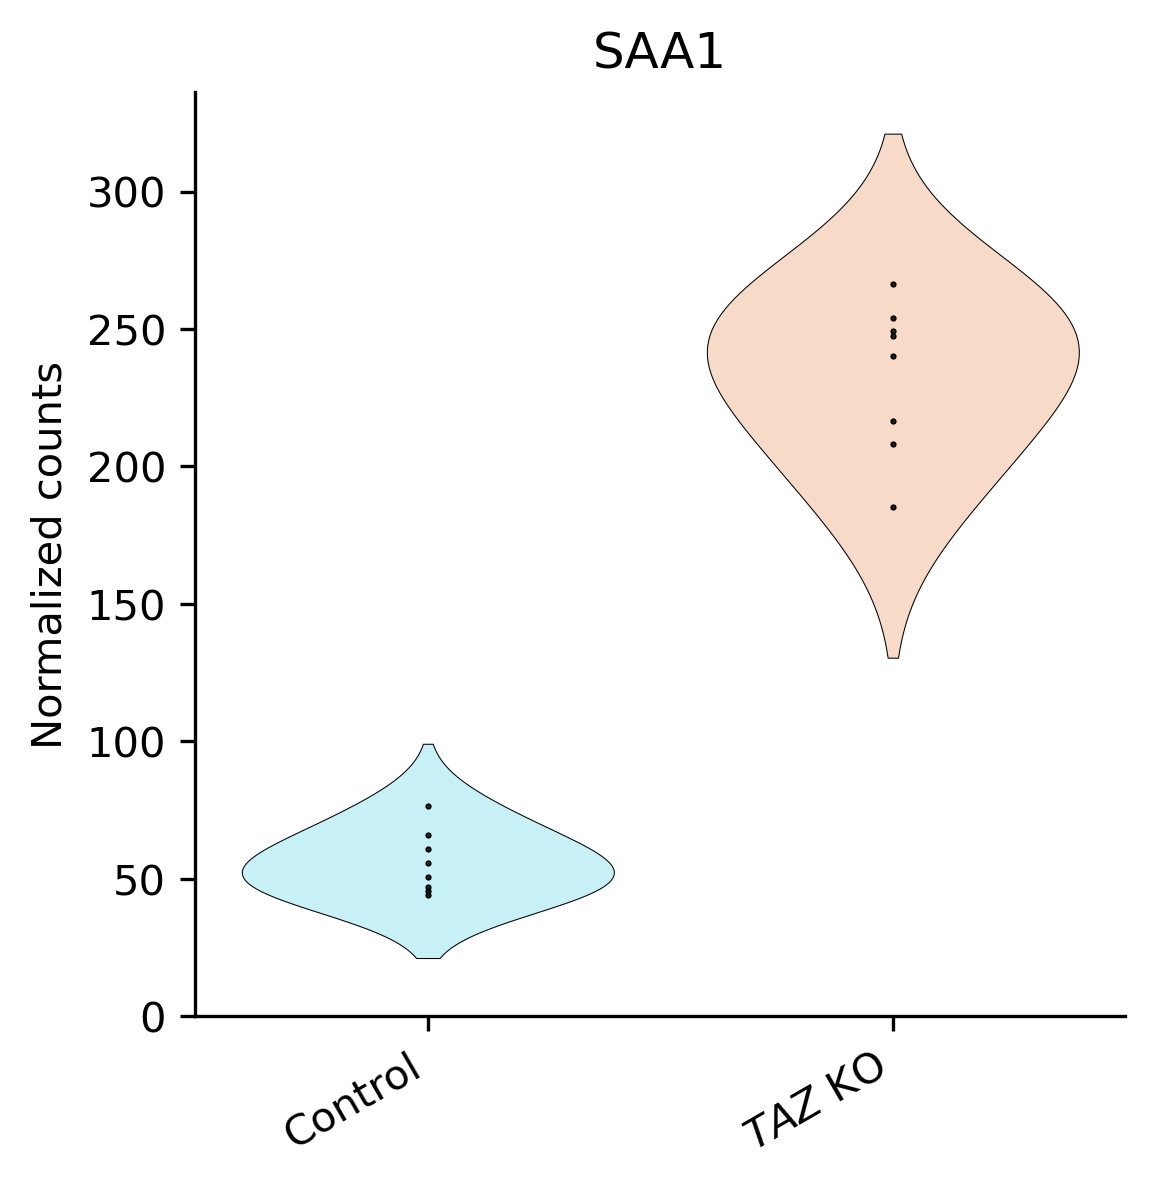

In [55]:
color_set = ['#C0F6FF', '#FFD9C0']

fig, ax = plt.subplots()

sns.violinplot(x=norm_counts_UP.index,
               y=norm_counts_UP.SAA1,
               hue=norm_counts_UP.index,
               palette=color_set,
               inner='point',
               bw_method=1,
               linewidth=0.25,
               linecolor='k'
              )

ax.set_xlabel(None)
ax.set_ylabel('Normalized counts')
ax.set_title('SAA1')
ax.set_xticks([0,1],
              ['Control', '$TAZ$ KO'],
              rotation=30,
              ha='right'
             )
plt.ylim(0)

sns.despine()
fig.set_dpi(300)
fig.set_size_inches(4,4)

<h2>Plot a box-and-whisker plot for a single gene</h2>

We can take our code for the violin plot and make modifications to the arguments that we pass to the <code>sns.boxplot()</code> function:

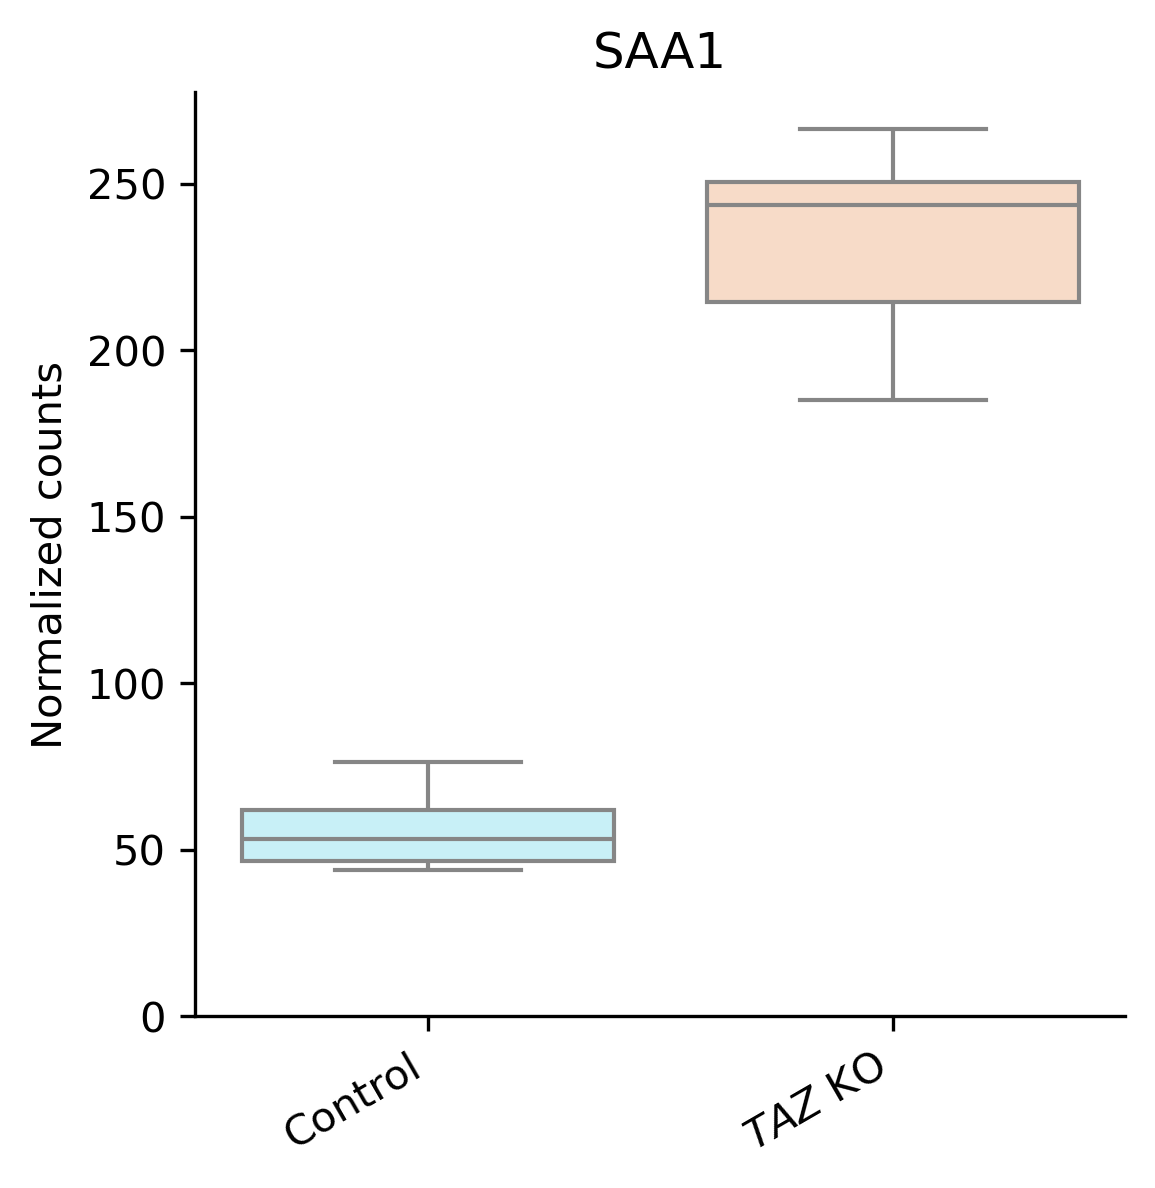

In [56]:
color_set = ['#C0F6FF', '#FFD9C0']

fig, ax = plt.subplots()

sns.boxplot(x=norm_counts_UP.index,
               y=norm_counts_UP.SAA1,
               hue=norm_counts_UP.index,
               palette=color_set
              )

ax.set_xlabel(None)
ax.set_ylabel('Normalized counts')
ax.set_title('SAA1')
ax.set_xticks([0,1],
              ['Control', '$TAZ$ KO'],
              rotation=30,
              ha='right'
             )
plt.ylim(0)

sns.despine()
fig.set_dpi(300)
fig.set_size_inches(4,4)

<h2>Set up to plot multiple gene(s) on a single plot</h2>

The set up to plot multiple genes on a single violin plot or box-and-whisker plot is slightly different than plotting a single gene. Whereas the "wide-format" of our original DataFrame allows us to distinguish between the conditions of each gene, if we want to plot multiple genes, we'll also need to distinguish between genes as well. One way to do this is to convert the "wide-format" DataFrame into a "long-format" DataFrame, where all the normalized count values are contained within a single, long column, and the associated information on which condition (either control or TAZ KO) and which gene it comes from are located in their own respective columns. So with this format, each row corresponds to a single normalized count value and its "metadata".

<table style="text-align: center; margin: auto;">
    <tr>
        <th style="border: none">&nbsp;</th>
        <th style="border: 1px solid; border-color: #000000;">condition</th>
        <th style="border: 1px solid; border-color: #000000;">count</th>
        <th style="border: 1px solid; border-color: #000000;">gene</th>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">0</th>
        <td style="border: 1px solid; border-color: #000000;">control</td>
        <td style="border: 1px solid; border-color: #000000;">100.000</td>
        <td style="border: 1px solid; border-color: #000000;">first_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">1</th>
        <td style="border: 1px solid; border-color: #000000;">taz_ko</td>
        <td style="border: 1px solid; border-color: #000000;">200.000</td>
        <td style="border: 1px solid; border-color: #000000;">first_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">2</th>
        <td style="border: 1px solid; border-color: #000000;">control</td>
        <td style="border: 1px solid; border-color: #000000;">150.000</td>
        <td style="border: 1px solid; border-color: #000000;">first_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">3</th>
        <td style="border: 1px solid; border-color: #000000;">taz_ko</td>
        <td style="border: 1px solid; border-color: #000000;">300.000</td>
        <td style="border: 1px solid; border-color: #000000;">first_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">4</th>
        <td style="border: 1px solid; border-color: #000000;">control</td>
        <td style="border: 1px solid; border-color: #000000;">400.000</td>
        <td style="border: 1px solid; border-color: #000000;">second_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">5</th>
        <td style="border: 1px solid; border-color: #000000;">taz_ko</td>
        <td style="border: 1px solid; border-color: #000000;">900.000</td>
        <td style="border: 1px solid; border-color: #000000;">second_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">6</th>
        <td style="border: 1px solid; border-color: #000000;">control</td>
        <td style="border: 1px solid; border-color: #000000;">300.000</td>
        <td style="border: 1px solid; border-color: #000000;">second_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">7</th>
        <td style="border: 1px solid; border-color: #000000;">taz_ko</td>
        <td style="border: 1px solid; border-color: #000000;">600.000</td>
        <td style="border: 1px solid; border-color: #000000;">second_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">...</th>
        <td style="border: 1px solid; border-color: #000000;">...</td>
        <td style="border: 1px solid; border-color: #000000;">...</td>
        <td style="border: 1px solid; border-color: #000000;">...</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">96</th>
        <td style="border: 1px solid; border-color: #000000;">control</td>
        <td style="border: 1px solid; border-color: #000000;">50.000</td>
        <td style="border: 1px solid; border-color: #000000;">last_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">97</th>
        <td style="border: 1px solid; border-color: #000000;">taz_ko</td>
        <td style="border: 1px solid; border-color: #000000;">70.000</td>
        <td style="border: 1px solid; border-color: #000000;">last_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">98</th>
        <td style="border: 1px solid; border-color: #000000;">control</td>
        <td style="border: 1px solid; border-color: #000000;">20.000</td>
        <td style="border: 1px solid; border-color: #000000;">last_gene</td>
    </tr>
    <tr>
        <th style="border: 1px solid; border-color: #000000;">99</th>
        <td style="border: 1px solid; border-color: #000000;">taz_ko</td>
        <td style="border: 1px solid; border-color: #000000;">30.000</td>
        <td style="border: 1px solid; border-color: #000000;">last_gene</td>
    </tr>
</table>

This can kind of be thought of as flattening our DataFrame, since we're collapsing our 2D normalized count matrix into a single column, and the other columns can be thought of as extra information on where the values came from, so that we can distinguish between genes and conditions.

First, let's take a look again at our normalized counts, and for this example, we're interested in taking a look at just our top upregulated genes.

In [57]:
norm_counts_UP

gene,SAA1,BMP4,PPME1,THBS1,CEMIP,UCA1,COL5A1,NUP210,NEDD9,AKR1B1
control,45.450508,10.868600,42.486344,1204.438463,54.342999,4.940273,74.104089,1.976109,8.892491,67.187708
taz_ko,185.195032,127.918218,177.558123,3572.163959,156.556625,73.505244,224.334188,70.641404,57.276814,172.785055
control,65.958756,9.844590,44.300657,1280.781223,49.222952,9.844590,52.176330,4.922295,13.782427,103.368200
taz_ko,266.316339,137.333861,185.586299,3067.741516,207.856654,61.243479,275.595653,67.738999,77.018314,199.505271
control,43.980860,16.614991,34.207335,1236.350828,35.184688,12.705582,78.188195,6.841467,6.841467,78.188195
taz_ko,249.135494,133.922637,162.479670,3303.753296,178.235275,62.037692,273.753626,65.976593,62.037692,179.220000
control,46.956714,19.565297,47.934979,1283.483512,45.978449,5.869589,97.826487,5.869589,11.739178,77.282925
taz_ko,247.413801,148.834865,206.822474,3370.046577,165.264687,79.249733,258.044863,41.557787,60.886990,184.593890
control,60.812378,20.582651,47.714327,1130.174647,60.812378,11.226900,74.846003,2.806725,15.904776,94.493079
taz_ko,208.329011,150.510827,175.290049,3404.848597,144.086585,65.160175,227.601739,55.982686,61.489180,185.385288


To flatten our DataFrame, we can make use of the function <code>pd.melt()</code> which will allow us to convert the format of our DataFrame from a "wide-format" to a "long-format".

<a href="https://pandas.pydata.org/docs/reference/api/pandas.melt.html" rel="noopener noreferrer" target="_blank"><u>Documentation for <code>pd.melt()</code> is here.</u></a>

In [58]:
norm_counts_UP.columns.to_list()

['SAA1',
 'BMP4',
 'PPME1',
 'THBS1',
 'CEMIP',
 'UCA1',
 'COL5A1',
 'NUP210',
 'NEDD9',
 'AKR1B1']

In [59]:
norm_counts_UP.reset_index(inplace=True)

In [62]:
norm_counts_UP

gene,condition,SAA1,BMP4,PPME1,THBS1,CEMIP,UCA1,COL5A1,NUP210,NEDD9,AKR1B1
0,control,45.450508,10.868600,42.486344,1204.438463,54.342999,4.940273,74.104089,1.976109,8.892491,67.187708
1,taz_ko,185.195032,127.918218,177.558123,3572.163959,156.556625,73.505244,224.334188,70.641404,57.276814,172.785055
2,control,65.958756,9.844590,44.300657,1280.781223,49.222952,9.844590,52.176330,4.922295,13.782427,103.368200
3,taz_ko,266.316339,137.333861,185.586299,3067.741516,207.856654,61.243479,275.595653,67.738999,77.018314,199.505271
4,control,43.980860,16.614991,34.207335,1236.350828,35.184688,12.705582,78.188195,6.841467,6.841467,78.188195
5,taz_ko,249.135494,133.922637,162.479670,3303.753296,178.235275,62.037692,273.753626,65.976593,62.037692,179.220000
6,control,46.956714,19.565297,47.934979,1283.483512,45.978449,5.869589,97.826487,5.869589,11.739178,77.282925
7,taz_ko,247.413801,148.834865,206.822474,3370.046577,165.264687,79.249733,258.044863,41.557787,60.886990,184.593890
8,control,60.812378,20.582651,47.714327,1130.174647,60.812378,11.226900,74.846003,2.806725,15.904776,94.493079
9,taz_ko,208.329011,150.510827,175.290049,3404.848597,144.086585,65.160175,227.601739,55.982686,61.489180,185.385288


In [61]:
norm_counts_UP.rename(columns={'index' : 'condition'}, inplace=True)

In [ ]:
#norm_counts_UP.drop(columns='index', inplace=True)

In [63]:
norm_counts_UP_melt = pd.melt(norm_counts_UP, 
                              id_vars=['condition'], 
                              value_vars=norm_counts_UP.columns.to_list(),
                              value_name='count'
                             )

In [64]:
norm_counts_UP_melt

,condition,gene,count
0,control,SAA1,45.450508
1,taz_ko,SAA1,185.195032
2,control,SAA1,65.958756
3,taz_ko,SAA1,266.316339
4,control,SAA1,43.980860
...,...,...,...
155,taz_ko,AKR1B1,230.943882
156,control,AKR1B1,109.317853
157,taz_ko,AKR1B1,216.389912
158,control,AKR1B1,78.354533


<h2>Plot violin plot for upregulated genes</h2>

We can make use of the same code that we used before to plot a violin plot for one gene with slight modifications to have it plot multiple genes together on a single plot.

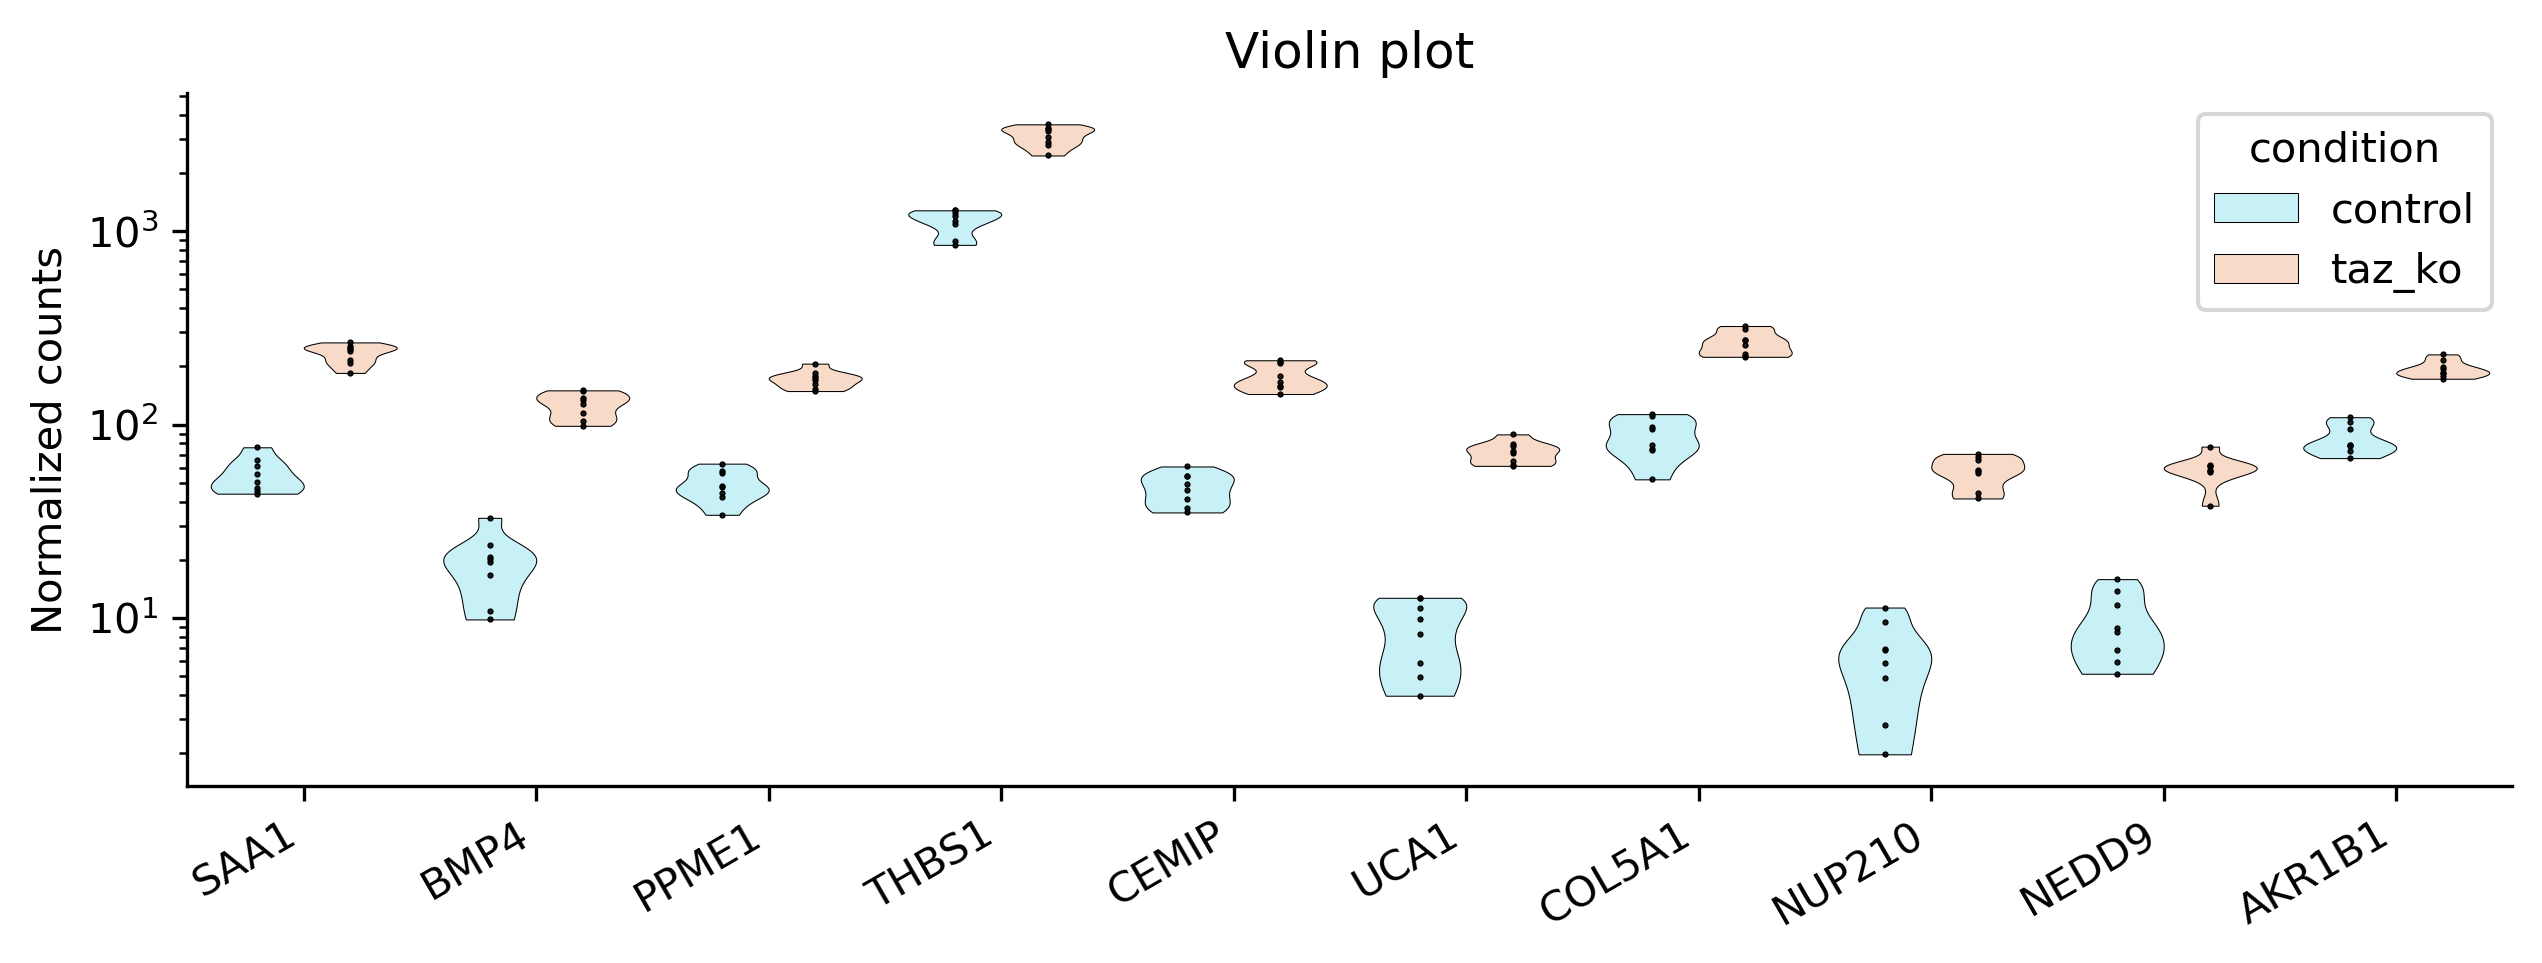

In [69]:
color_set = ['#C0F6FF', '#FFD9C0']

fig, ax = plt.subplots()

sns.violinplot(data=norm_counts_UP_melt,
               x='gene',
               y='count',
               hue='condition',
               palette=color_set,
               cut=0,
               inner='point',
               bw_method=0.5,
               linewidth=0.25,
               linecolor='k',
               density_norm='width'
              )
ax.set_yscale('log')

ax.set_xlabel(None)
ax.set_ylabel('Normalized counts')
ax.set_title('Violin plot')
plt.xticks(rotation=30,
           ha='right'
          )
# plt.ylim(0)

sns.despine()
fig.set_dpi(300)
fig.set_size_inches(10,3)

<h2>Plot a box-and-whisker plot for upregulated genes</h2>

We can similarly modify our box-and-whisker plot code to have it plot multiple genes on the same plot:

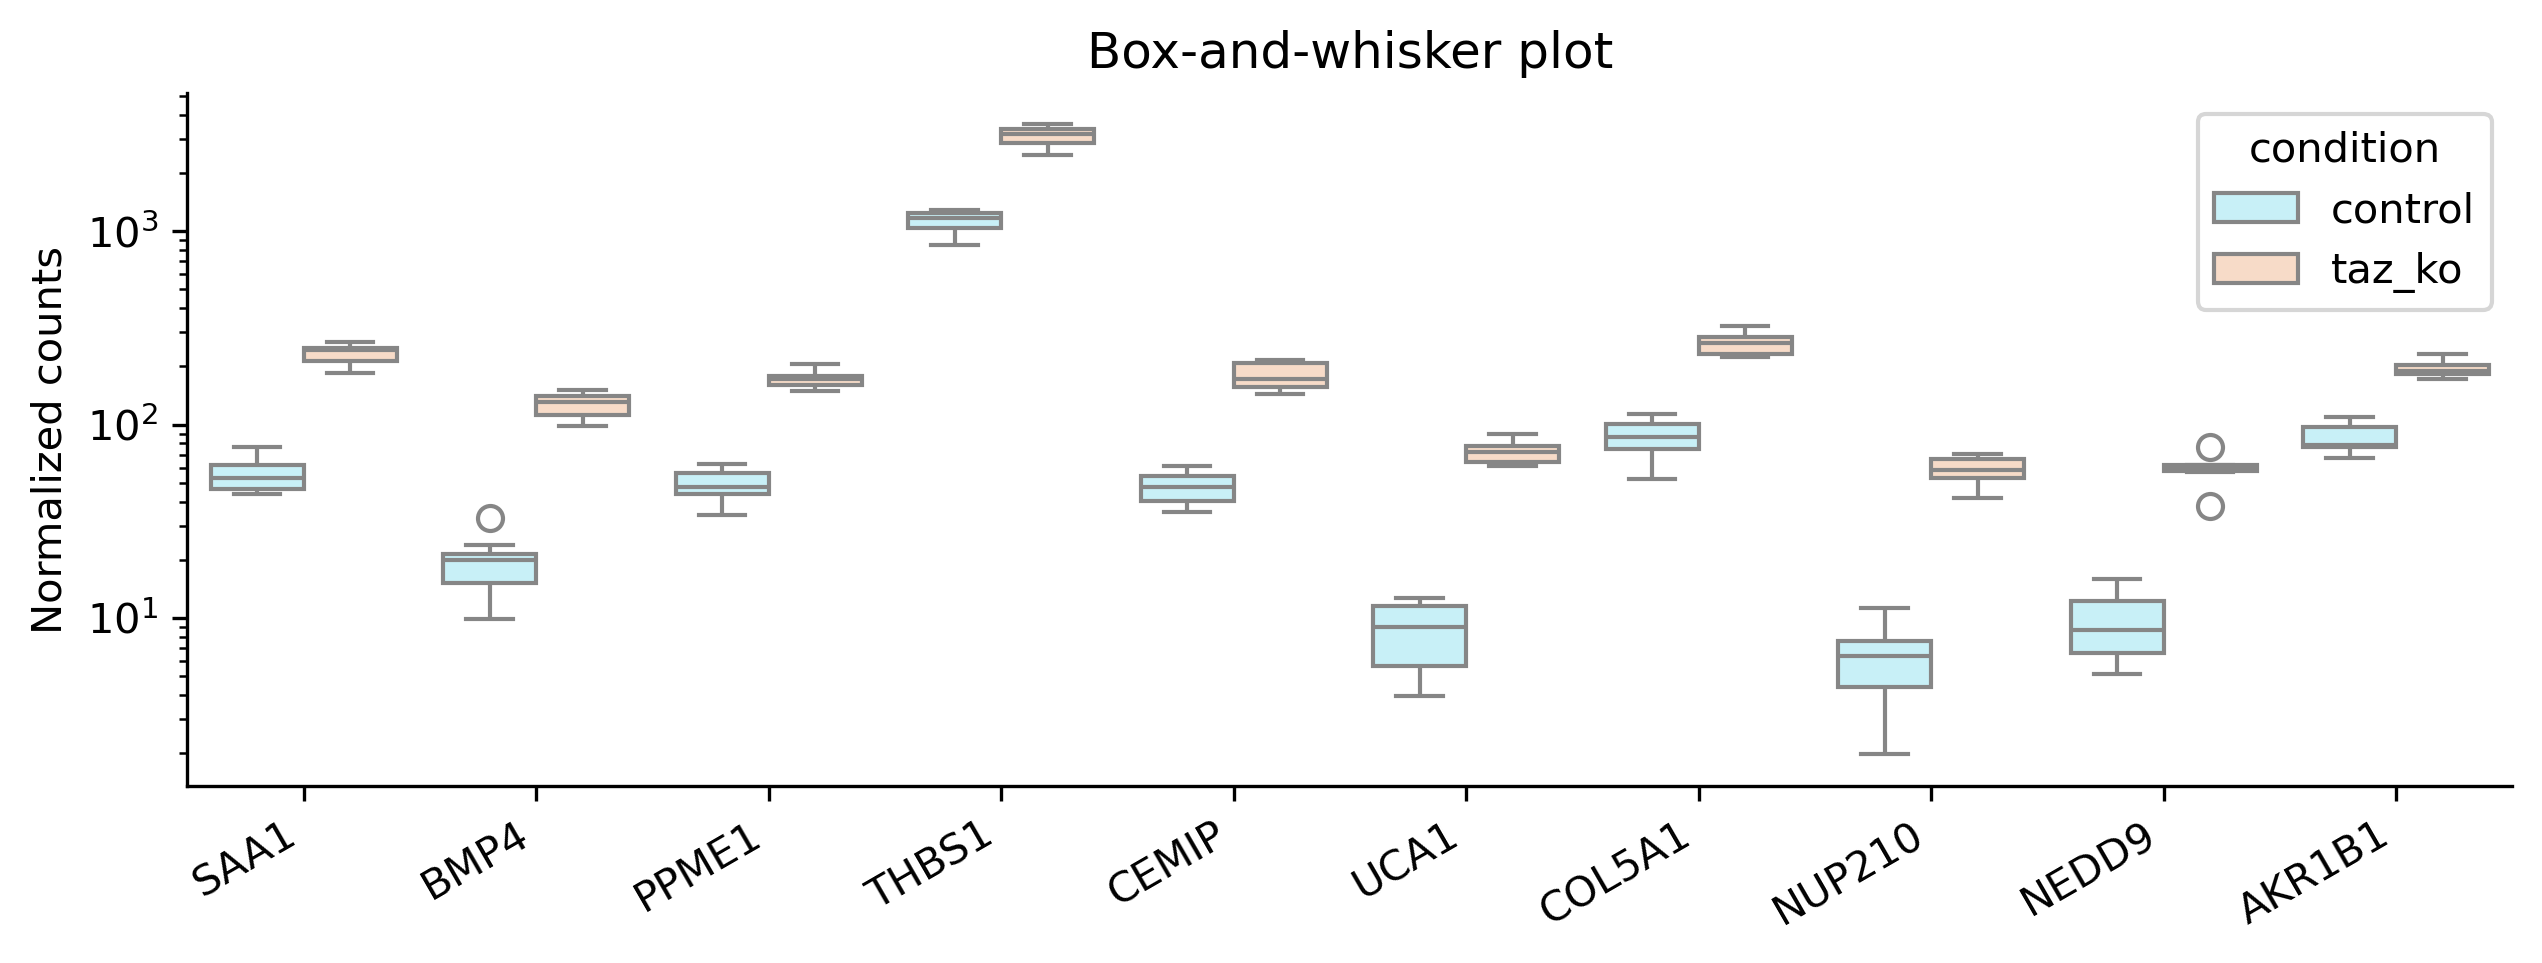

In [70]:
color_set = ['#C0F6FF', '#FFD9C0']

fig, ax = plt.subplots()

sns.boxplot(data=norm_counts_UP_melt,
               x='gene',
               y='count',
               hue='condition',
               palette=color_set,
              )

ax.set_yscale('log')

ax.set_xlabel(None)
ax.set_ylabel('Normalized counts')
ax.set_title('Box-and-whisker plot')
plt.xticks(rotation=30,
           ha='right'
          )
# plt.ylim(0)

sns.despine()
fig.set_dpi(300)
fig.set_size_inches(10,3)